In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Training dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.9MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 309kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.52MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 14.3MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
# Testing dataset
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [5]:
# Validation sample from training dataset
indices = list(range(len(training_data)))
np.random.shuffle(indices)
split = int(np.floor(0.2 * len(training_data)))
train_sample = SubsetRandomSampler(indices[:split])
validate_sample = SubsetRandomSampler(indices[split:])

In [6]:
# Data loaders
trainloader = torch.utils.data.DataLoader(training_data, sampler=train_sample, batch_size=64)
validloader = torch.utils.data.DataLoader(training_data, sampler=validate_sample, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle = True)

In [8]:
# Data iterator
%matplotlib inline
dataiter = iter(trainloader)
print(dataiter)
images, labels = next(dataiter)

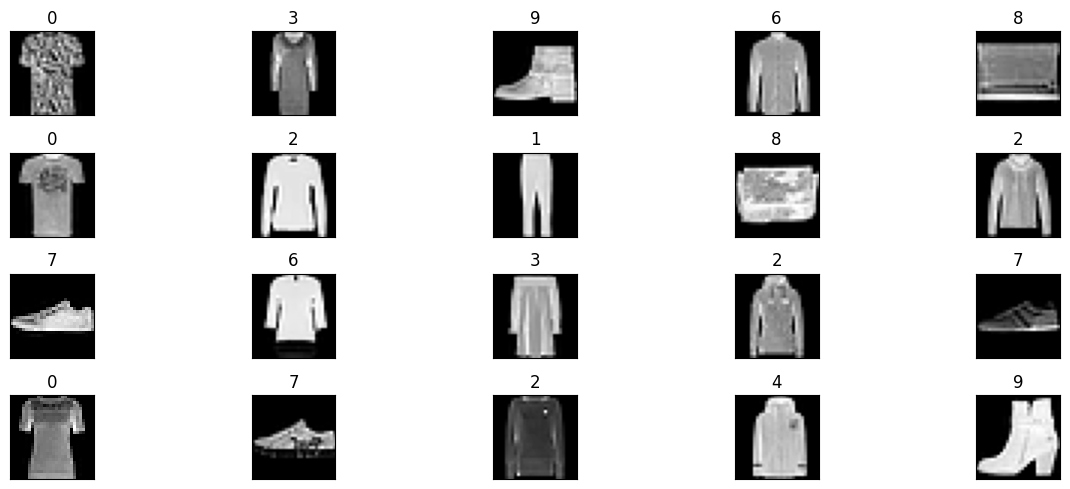

In [9]:
# Plot the data
fig = plt.figure(figsize=(15,5))
for i in np.arange(20):
    ax = fig.add_subplot(4, int(20/4), i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(labels[i].item())
    fig.tight_layout()